In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("E:\Kaggle Datasets\IPL DATA/matches.csv")

In [3]:
df.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [4]:
df.shape

(756, 18)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
id                 756 non-null int64
Season             756 non-null object
city               749 non-null object
date               756 non-null object
team1              756 non-null object
team2              756 non-null object
toss_winner        756 non-null object
toss_decision      756 non-null object
result             756 non-null object
dl_applied         756 non-null int64
winner             752 non-null object
win_by_runs        756 non-null int64
win_by_wickets     756 non-null int64
player_of_match    752 non-null object
venue              756 non-null object
umpire1            754 non-null object
umpire2            754 non-null object
umpire3            119 non-null object
dtypes: int64(4), object(14)
memory usage: 106.4+ KB


In [6]:
df.isna().sum()

id                   0
Season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [7]:
df[df['city'].isna()]

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
461,462,IPL-2014,NaN,19-04-2014,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,7,PA Patel,Dubai International Cricket Stadium,Aleem Dar,AK Chaudhary,NaN
462,463,IPL-2014,NaN,19-04-2014,Kolkata Knight Riders,Delhi Daredevils,Kolkata Knight Riders,bat,normal,0,Delhi Daredevils,0,4,JP Duminy,Dubai International Cricket Stadium,Aleem Dar,VA Kulkarni,NaN
466,467,IPL-2014,NaN,23-04-2014,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,normal,0,Chennai Super Kings,7,0,RA Jadeja,Dubai International Cricket Stadium,HDPK Dharmasena,RK Illingworth,NaN
468,469,IPL-2014,NaN,25-04-2014,Sunrisers Hyderabad,Delhi Daredevils,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,4,0,AJ Finch,Dubai International Cricket Stadium,M Erasmus,S Ravi,NaN
469,470,IPL-2014,NaN,25-04-2014,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Chennai Super Kings,0,7,MM Sharma,Dubai International Cricket Stadium,BF Bowden,M Erasmus,NaN
474,475,IPL-2014,NaN,28-04-2014,Royal Challengers Bangalore,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,5,Sandeep Sharma,Dubai International Cricket Stadium,BF Bowden,S Ravi,NaN
476,477,IPL-2014,NaN,30-04-2014,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Sunrisers Hyderabad,15,0,B Kumar,Dubai International Cricket Stadium,HDPK Dharmasena,M Erasmus,NaN


In [8]:
na_index = df[df['city'].isna()].index

for index in na_index:
    df['city'][index] = "Dubai"

C:\Users\paddy\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [9]:
# Dropping rows with unknown winners
df.drop(df[df['winner'].isna()].index,inplace=True)

In [10]:
# Looking for nan values of umpire 2 and 3
df[df['umpire2'].isna()]

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
753,11413,IPL-2019,Visakhapatnam,08-05-2019,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN


In [11]:
# Filling with mode
print(df.umpire1.mode())
print(df.umpire2.mode())

0    HDPK Dharmasena
dtype: object
0    C Shamshuddin
1           S Ravi
dtype: object


In [12]:
df['umpire1'].fillna("HDPK Dharmasena",inplace=True)
df['umpire2'].fillna("C Shamshuddin",inplace=True)

In [13]:
# Dropping umpire 3 column
del df['umpire3']

In [14]:
# Checking for nan values

In [15]:
df.isna().mean()

id                 0.0
Season             0.0
city               0.0
date               0.0
team1              0.0
team2              0.0
toss_winner        0.0
toss_decision      0.0
result             0.0
dl_applied         0.0
winner             0.0
win_by_runs        0.0
win_by_wickets     0.0
player_of_match    0.0
venue              0.0
umpire1            0.0
umpire2            0.0
dtype: float64

#### Exploratory Data Analysis

In [34]:
df.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,HDPK Dharmasena,C Shamshuddin


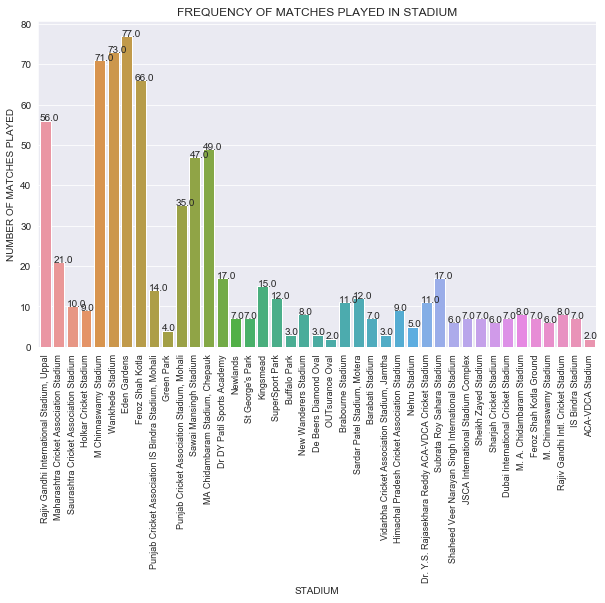

In [44]:
sns.set_style("darkgrid")
plt.figure(figsize=(10,6))
plt.title("FREQUENCY OF MATCHES PLAYED IN STADIUM")
ax = sns.countplot(df['venue'])
ax.set_xlabel("STADIUM")
ax.set_ylabel("NUMBER OF MATCHES PLAYED")
ax.set_xticklabels(ax.get_xticklabels(),rotation=90,size=9)

for p in ax.patches:
    ax.annotate("{:.1f}".format(p.get_height()),(p.get_x(),p.get_height()))
    
plt.show()

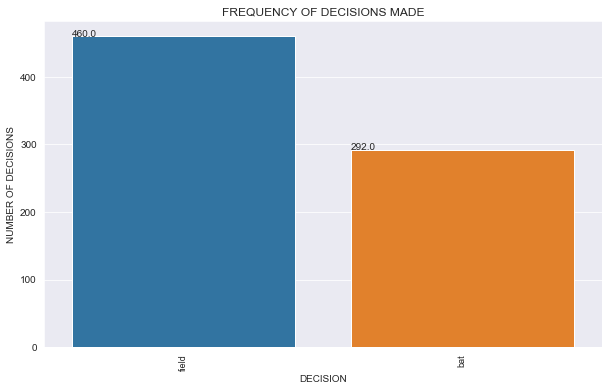

In [50]:
sns.set_style("darkgrid")
plt.figure(figsize=(10,6))
plt.title("FREQUENCY OF DECISIONS MADE")
ax = sns.countplot(df['toss_decision'])
ax.set_xlabel("DECISION")
ax.set_ylabel("NUMBER OF DECISIONS")
ax.set_xticklabels(ax.get_xticklabels(),rotation=90,size=9)

for p in ax.patches:
    ax.annotate("{:.1f}".format(p.get_height()),(p.get_x(),p.get_height()))
    
plt.show()

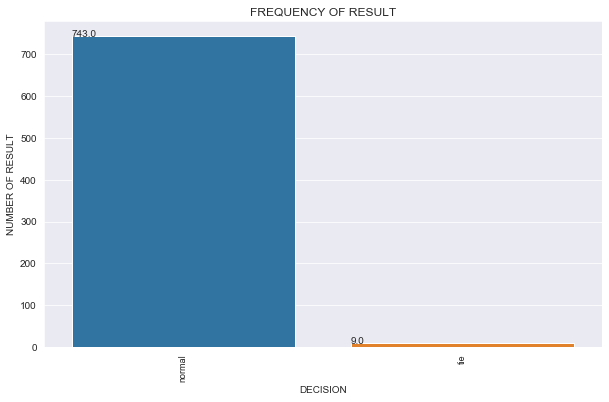

In [52]:
sns.set_style("darkgrid")
plt.figure(figsize=(10,6))
plt.title("FREQUENCY OF RESULT")
ax = sns.countplot(df['result'])
ax.set_xlabel("DECISION")
ax.set_ylabel("NUMBER OF RESULT")
ax.set_xticklabels(ax.get_xticklabels(),rotation=90,size=9)

for p in ax.patches:
    ax.annotate("{:.1f}".format(p.get_height()),(p.get_x(),p.get_height()))
    
plt.show()

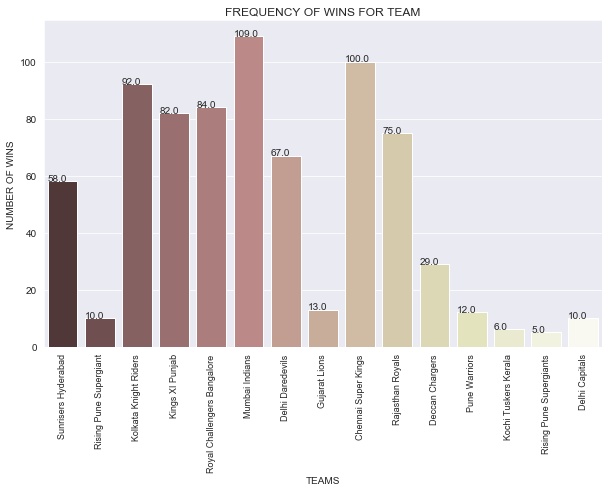

In [82]:
sns.set_style("darkgrid")
plt.figure(figsize=(10,6))
plt.title("FREQUENCY OF WINS FOR TEAM")
ax = sns.countplot(df['winner'],palette='pink')
ax.set_xlabel("TEAMS")
ax.set_ylabel("NUMBER OF WINS")
ax.set_xticklabels(ax.get_xticklabels(),rotation=90,size=9)

for p in ax.patches:
    ax.annotate("{:.1f}".format(p.get_height()),(p.get_x(),p.get_height()))
    
plt.show()

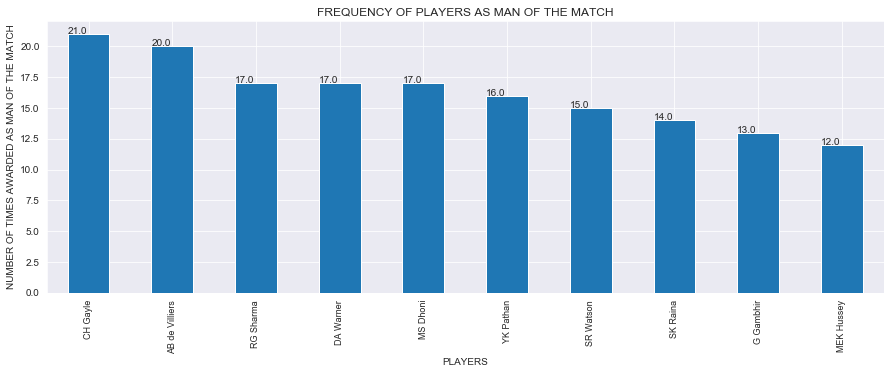

In [93]:
sns.set_style("darkgrid")
plt.figure(figsize=(15,5))
plt.title("FREQUENCY OF PLAYERS AS MAN OF THE MATCH")
ax = df['player_of_match'].value_counts()[:10].plot("bar")
ax.set_xlabel("PLAYERS")
ax.set_ylabel("NUMBER OF TIMES AWARDED AS MAN OF THE MATCH")
ax.set_xticklabels(ax.get_xticklabels(),rotation=90,size=9)

for p in ax.patches:
    ax.annotate("{:.1f}".format(p.get_height()),(p.get_x(),p.get_height()))
    
plt.show()

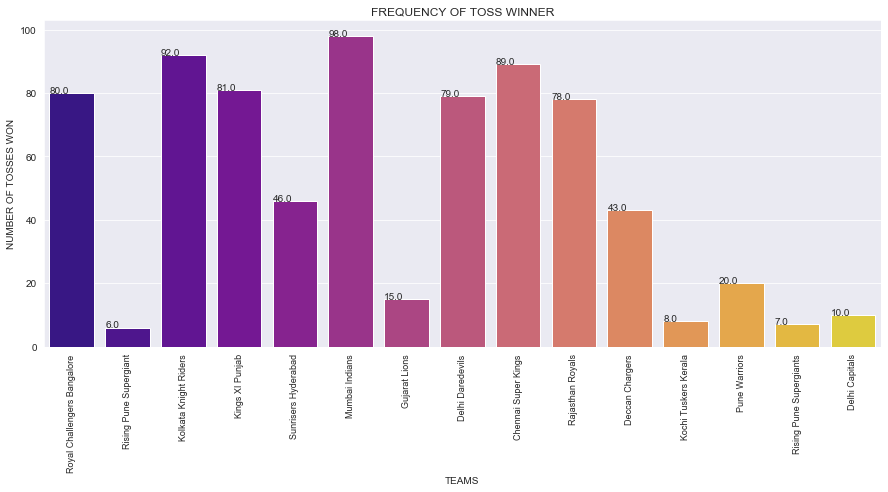

In [94]:
sns.set_style("darkgrid")
plt.figure(figsize=(15,6))
plt.title("FREQUENCY OF TOSS WINNER")
ax = sns.countplot(df['toss_winner'],palette='plasma')
ax.set_xlabel("TEAMS")
ax.set_ylabel("NUMBER OF TOSSES WON")
ax.set_xticklabels(ax.get_xticklabels(),rotation=90,size=9)

for p in ax.patches:
    ax.annotate("{:.1f}".format(p.get_height()),(p.get_x(),p.get_height()))
    
plt.show()

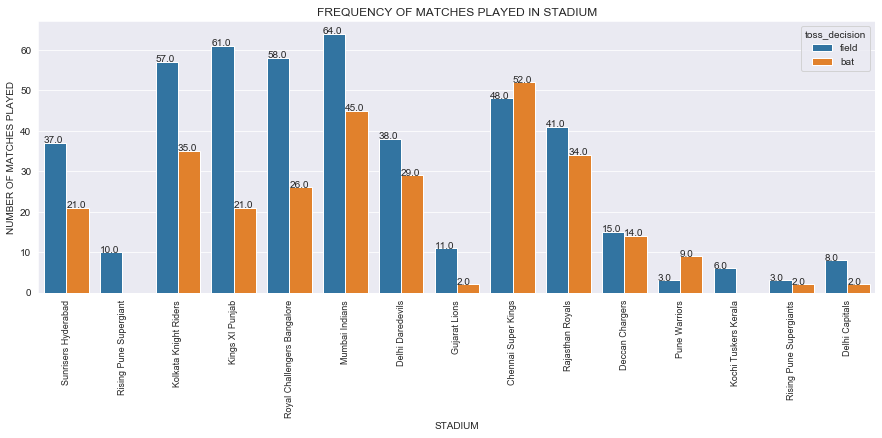

In [58]:
sns.set_style("darkgrid")
plt.figure(figsize=(15,5))
plt.title("FREQUENCY OF MATCHES PLAYED IN STADIUM")
ax = sns.countplot(df['winner'],hue=df['toss_decision'])
ax.set_xlabel("STADIUM")
ax.set_ylabel("NUMBER OF MATCHES PLAYED")
ax.set_xticklabels(ax.get_xticklabels(),rotation=90,size=9)

for p in ax.patches:
    ax.annotate("{:.1f}".format(p.get_height()),(p.get_x(),p.get_height()))
    
plt.show()

In [63]:
### Making date month year column for further analysis and modelling

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,HDPK Dharmasena,C Shamshuddin
5,6,IPL-2017,Hyderabad,09-04-2017,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,9,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal",A Deshmukh,NJ Llong
6,7,IPL-2017,Mumbai,09-04-2017,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,N Rana,Wankhede Stadium,Nitin Menon,CK Nandan
7,8,IPL-2017,Indore,10-04-2017,Royal Challengers Bangalore,Kings XI Punjab,Royal Challengers Bangalore,bat,normal,0,Kings XI Punjab,0,8,AR Patel,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
8,9,IPL-2017,Pune,11-04-2017,Delhi Daredevils,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Delhi Daredevils,97,0,SV Samson,Maharashtra Cricket Association Stadium,AY Dandekar,S Ravi
9,10,IPL-2017,Mumbai,12-04-2017,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,JJ Bumrah,Wankhede Stadium,Nitin Menon,CK Nandan


In [15]:
day = []
month = []
year = []
for date in df['date']:
    date = date.split("-")
    day.append(date[0])
    month.append(date[1])
    year.append(date[2])

In [16]:
df['day'] = day
df['month'] = month
df['year'] = year

In [17]:
del df['date']
del df['Season']

In [19]:
df.head()

,id,city,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,day,month,year
0,1,Hyderabad,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,05,04,2017
1,2,Pune,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,06,04,2017
2,3,Rajkot,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,07,04,2017
3,4,Indore,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,08,04,2017
4,5,Bangalore,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,HDPK Dharmasena,C Shamshuddin,08,04,2017


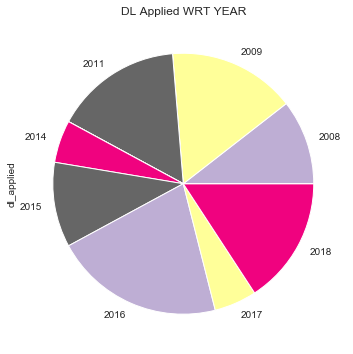

In [141]:
plt.figure(figsize=(12,6))
cmap = plt.get_cmap("Accent")
colors = [cmap(i) for i in range(1,8,2)]
plt.title("DL Applied WRT YEAR")
df.groupby('year').sum()['dl_applied'].plot('pie',colors=colors)
plt.show()

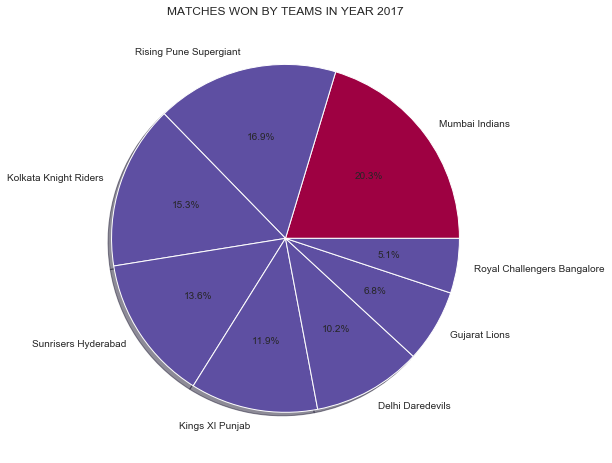

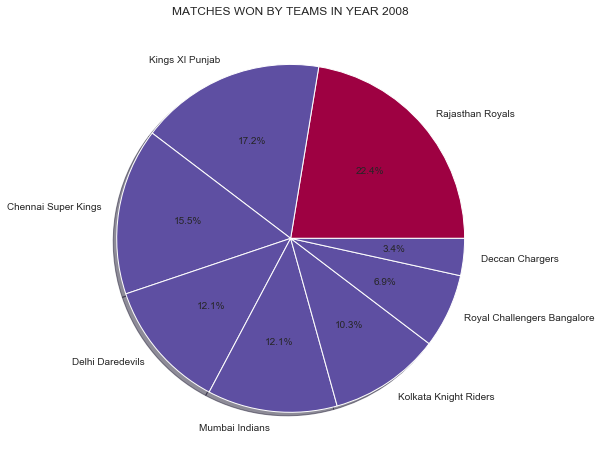

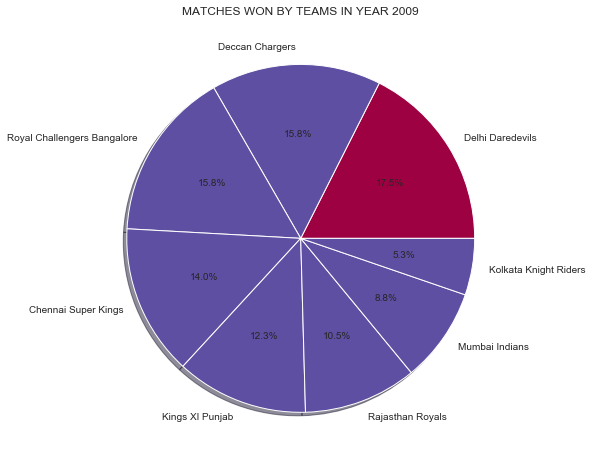

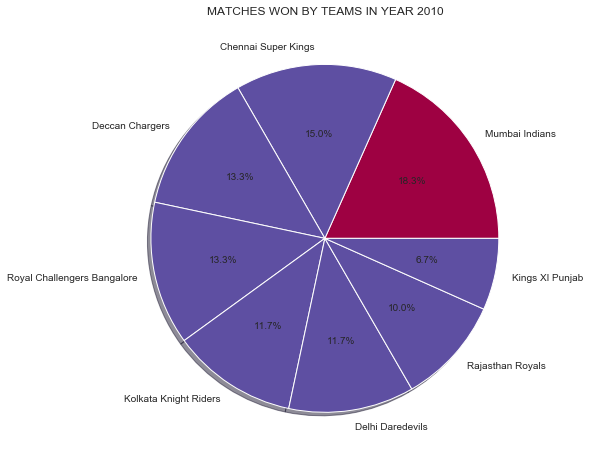

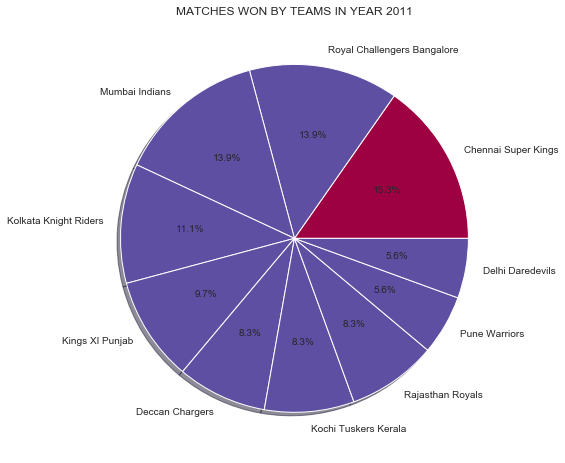

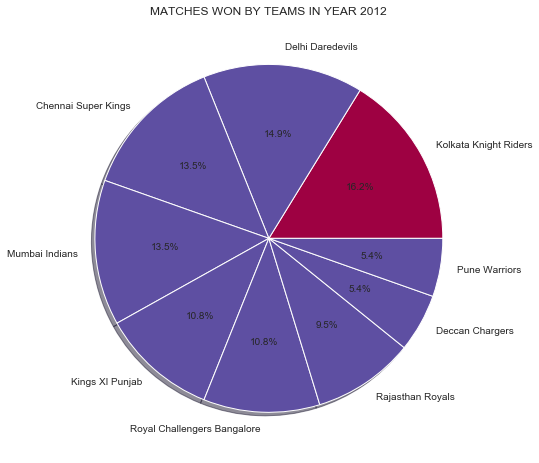

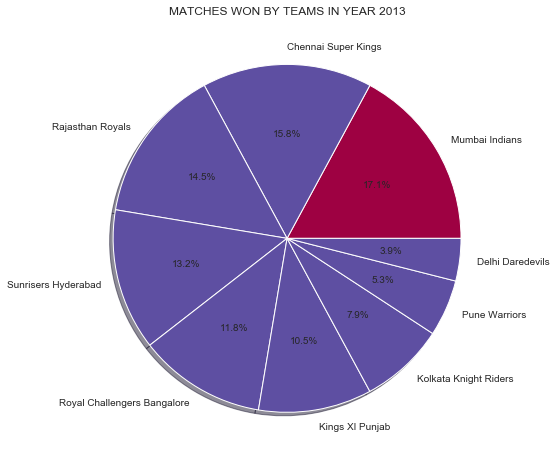

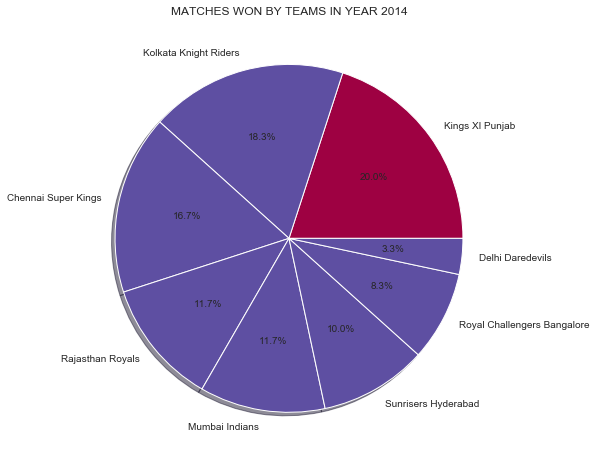

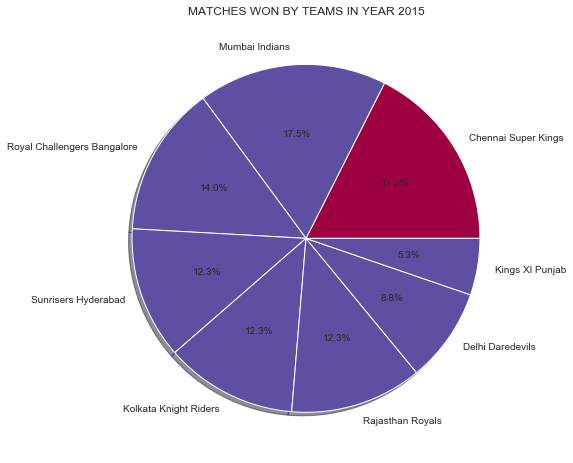

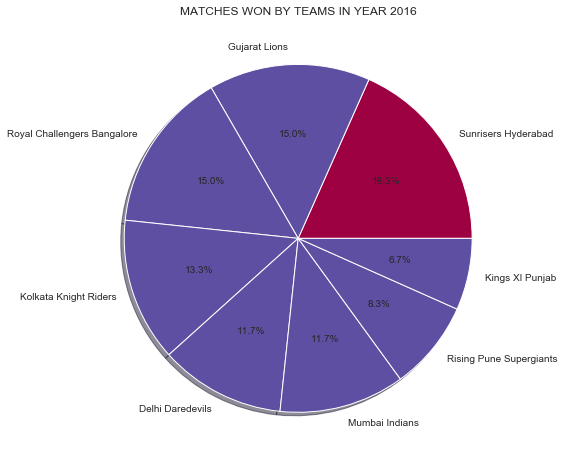

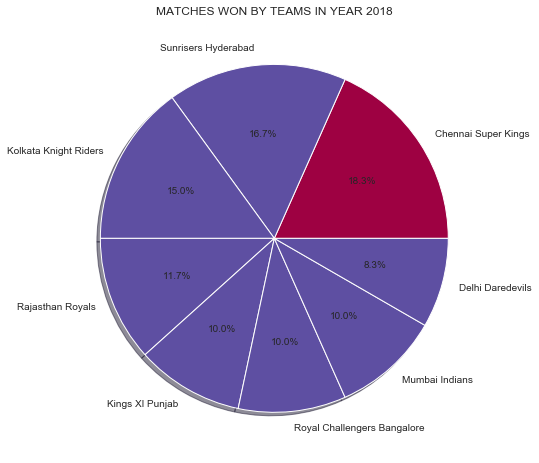

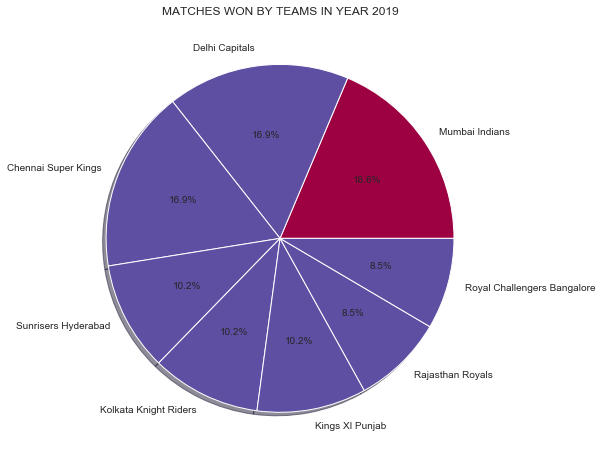

In [126]:
import numpy as np
for year in df['year'].unique():
    data = df[df['year']==year]['winner'].value_counts()
    cmap = plt.get_cmap('Spectral')
    colors = [cmap(i) for i in np.linspace(0, 11, 11)]
    sns.set_style('darkgrid')
    plt.figure(figsize=(15,8))
    plt.title("MATCHES WON BY TEAMS IN YEAR {}".format(year))
    plt.pie(data,shadow=True,autopct='%1.1f%%',labels=data.index,colors=colors)
    
    plt.show()

In [142]:
df.head()

,id,city,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,day,month,year
0,1,Hyderabad,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,05,04,2017
1,2,Pune,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,06,04,2017
2,3,Rajkot,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,07,04,2017
3,4,Indore,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,08,04,2017
4,5,Bangalore,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,HDPK Dharmasena,C Shamshuddin,08,04,2017


In [18]:
train = df.copy()

###### Feature Engineering

In [32]:
for column in df.columns:
    print(column," --- \n\n",df[column].unique())

id  --- 

 [    1     2     3     4     5     6     7     8     9    10    11    12
    13    14    15    16    17    18    19    20    21    22    23    24
    25    26    27    28    29    30    31    32    33    34    35    36
    37    38    39    40    41    42    43    44    45    46    47    48
    49    50    51    52    53    54    55    56    57    58    59    60
    61    62    63    64    65    66    67    68    69    70    71    72
    73    74    75    76    77    78    79    80    81    82    83    84
    85    86    87    88    89    90    91    92    93    94    95    96
    97    98    99   100   101   102   103   104   105   106   107   108
   109   110   111   112   113   114   115   116   117   118   119   120
   121   122   123   124   125   126   127   128   129   130   131   132
   133   134   135   136   137   138   139   140   141   142   143   144
   145   146   147   148   149   150   151   152   153   154   155   156
   157   158   159   160   161   162   1

In [26]:
train.head(3)

,id,city,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,day,month,year
0,1,Hyderabad,team1 Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,05,04,2017
1,2,Pune,team1 Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,06,04,2017
2,3,Rajkot,team1 Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,07,04,2017


In [19]:
del train['id']

In [15]:
## Preparing features for onehot encoding

In [20]:
train['team1'] = 'team1 '+ train['team1']

In [21]:
train['team2'] = 'team2 ' + train['team2']

In [22]:
train['toss_winner'] = 'toss_winner ' + train['toss_winner']

In [23]:
train['winner'] = 'winner_' + train['winner']

In [24]:
dummy = pd.get_dummies(train[['city','team1','team2','toss_winner','venue']])

In [25]:
train = pd.concat([train,dummy],join='inner',axis=1)

In [26]:
train.drop(columns=['city','team1','team2','toss_winner','venue'],axis=1,inplace=True)

In [27]:
train.head()

,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,umpire1,umpire2,day,...,venue_Saurashtra Cricket Association Stadium,venue_Sawai Mansingh Stadium,venue_Shaheed Veer Narayan Singh International Stadium,venue_Sharjah Cricket Stadium,venue_Sheikh Zayed Stadium,venue_St George's Park,venue_Subrata Roy Sahara Stadium,venue_SuperSport Park,"venue_Vidarbha Cricket Association Stadium, Jamtha",venue_Wankhede Stadium
0,field,normal,0,winner_Sunrisers Hyderabad,35,0,Yuvraj Singh,AY Dandekar,NJ Llong,05,...,0,0,0,0,0,0,0,0,0,0
1,field,normal,0,winner_Rising Pune Supergiant,0,7,SPD Smith,A Nand Kishore,S Ravi,06,...,0,0,0,0,0,0,0,0,0,0
2,field,normal,0,winner_Kolkata Knight Riders,0,10,CA Lynn,Nitin Menon,CK Nandan,07,...,1,0,0,0,0,0,0,0,0,0
3,field,normal,0,winner_Kings XI Punjab,0,6,GJ Maxwell,AK Chaudhary,C Shamshuddin,08,...,0,0,0,0,0,0,0,0,0,0
4,bat,normal,0,winner_Royal Challengers Bangalore,15,0,KM Jadhav,HDPK Dharmasena,C Shamshuddin,08,...,0,0,0,0,0,0,0,0,0,0


In [28]:
#Encoding toss_decision
mapp = {"field":1,'bat':0}

train['toss_decision'] = train['toss_decision'].map(mapp)

In [29]:
# Encoding Result
mapp = {'normal':0,'tie':1}
train['result'] = train['result'].map(mapp)

In [30]:
train.columns[:20]

Index(['toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'umpire1', 'umpire2', 'day',
       'month', 'year', 'city_Abu Dhabi', 'city_Ahmedabad', 'city_Bangalore',
       'city_Bengaluru', 'city_Bloemfontein', 'city_Cape Town',
       'city_Centurion', 'city_Chandigarh'],
      dtype='object')

In [31]:
train['winner'].unique()

array(['winner_Sunrisers Hyderabad', 'winner_Rising Pune Supergiant',
       'winner_Kolkata Knight Riders', 'winner_Kings XI Punjab',
       'winner_Royal Challengers Bangalore', 'winner_Mumbai Indians',
       'winner_Delhi Daredevils', 'winner_Gujarat Lions',
       'winner_Chennai Super Kings', 'winner_Rajasthan Royals',
       'winner_Deccan Chargers', 'winner_Pune Warriors',
       'winner_Kochi Tuskers Kerala', 'winner_Rising Pune Supergiants',
       'winner_Delhi Capitals'], dtype=object)

In [32]:
mapp = {
        'winner_Sunrisers Hyderabad':0,
        'winner_Rising Pune Supergiant':1,
       'winner_Kolkata Knight Riders':2,
       'winner_Kings XI Punjab':3,
       'winner_Royal Challengers Bangalore':4,
       'winner_Mumbai Indians':5,
       'winner_Delhi Daredevils':6,
       'winner_Gujarat Lions':7,
       'winner_Chennai Super Kings':8,
       'winner_Rajasthan Royals':9,
       'winner_Deccan Chargers':10,
       'winner_Pune Warriors':11,
       'winner_Kochi Tuskers Kerala':12,
       'winner_Rising Pune Supergiants':13,
       'winner_Delhi Capitals':14
}

train['winner'] = train['winner'].map(mapp)

In [33]:
train.head()

,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,umpire1,umpire2,day,...,venue_Saurashtra Cricket Association Stadium,venue_Sawai Mansingh Stadium,venue_Shaheed Veer Narayan Singh International Stadium,venue_Sharjah Cricket Stadium,venue_Sheikh Zayed Stadium,venue_St George's Park,venue_Subrata Roy Sahara Stadium,venue_SuperSport Park,"venue_Vidarbha Cricket Association Stadium, Jamtha",venue_Wankhede Stadium
0,1,0,0,0,35,0,Yuvraj Singh,AY Dandekar,NJ Llong,05,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,0,7,SPD Smith,A Nand Kishore,S Ravi,06,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,2,0,10,CA Lynn,Nitin Menon,CK Nandan,07,...,1,0,0,0,0,0,0,0,0,0
3,1,0,0,3,0,6,GJ Maxwell,AK Chaudhary,C Shamshuddin,08,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,4,15,0,KM Jadhav,HDPK Dharmasena,C Shamshuddin,08,...,0,0,0,0,0,0,0,0,0,0


In [34]:
train.drop(columns=['player_of_match','umpire1','umpire2','win_by_runs','win_by_wickets'],axis=1,inplace=True)

In [35]:
train['day'] = train['day'].astype('int64')
train['month'] = train['month'].astype('int64')
train['year'] = train['year'].astype("int64")

#### Checking If Theres Some Imbalance In The Data

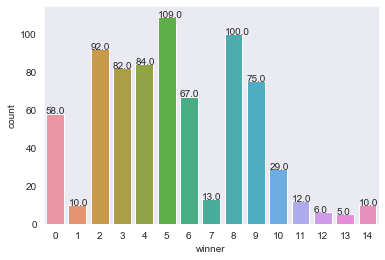

In [33]:
sns.set_style("dark")
ax = sns.countplot(train['winner'])

for p in ax.patches:
    ax.annotate("{:.1f}".format(p.get_height()),(p.get_x(),p.get_height()))
plt.show()

In [36]:
from sklearn.utils import resample

In [37]:
train_major = train[train['winner']==5]  # MAJOR CLASS

# MINOR CLASSES 
train_minor1 = train[train['winner']==0]
train_minor2 = train[train['winner']==1]
train_minor3 = train[train['winner']==2]
train_minor4 = train[train['winner']==3]
train_minor5 = train[train['winner']==4]
train_minor6 = train[train['winner']==6]
train_minor7 = train[train['winner']==7]
train_minor8 = train[train['winner']==8]
train_minor9 = train[train['winner']==9]
train_minor10 = train[train['winner']==10]
train_minor11 = train[train['winner']==11]
train_minor12 = train[train['winner']==12]
train_minor13 = train[train['winner']==13]
train_minor14 = train[train['winner']==14]

# upsamples data
train_minor1_sampled = resample(train_minor1,n_samples=109)
train_minor2_sampled = resample(train_minor2,n_samples=109)
train_minor3_sampled = resample(train_minor3,n_samples=109)
train_minor4_sampled = resample(train_minor4,n_samples=109)
train_minor5_sampled = resample(train_minor5,n_samples=109)
train_minor6_sampled = resample(train_minor6,n_samples=109)
train_minor7_sampled = resample(train_minor7,n_samples=109)
train_minor8_sampled = resample(train_minor8,n_samples=109)
train_minor9_sampled = resample(train_minor9,n_samples=109)
train_minor10_sampled = resample(train_minor10,n_samples=109)
train_minor11_sampled = resample(train_minor11,n_samples=109)
train_minor12_sampled = resample(train_minor12,n_samples=109)
train_minor13_sampled = resample(train_minor13,n_samples=109)
train_minor14_sampled = resample(train_minor14,n_samples=109)

# Concatiate major with upsampled

train_upsampled = pd.concat([train_major,
                            train_minor1_sampled,
                            train_minor2_sampled,
                            train_minor3_sampled,
                            train_minor4_sampled,
                            train_minor5_sampled,
                            train_minor6_sampled,
                            train_minor7_sampled,
                            train_minor8_sampled,
                            train_minor9_sampled,
                            train_minor10_sampled,
                            train_minor11_sampled,
                            train_minor12_sampled,
                            train_minor13_sampled,
                            train_minor14_sampled,
                            ])

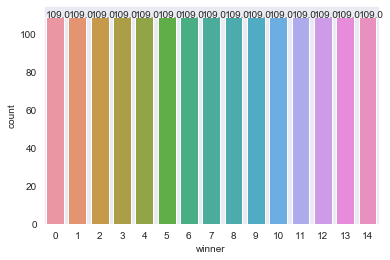

In [36]:
ax = sns.countplot(train_upsampled['winner'])

for p in ax.patches:
    ax.annotate("{:.1f}".format(p.get_height()),(p.get_x(),p.get_height()))
plt.show()

###### Feature Selection

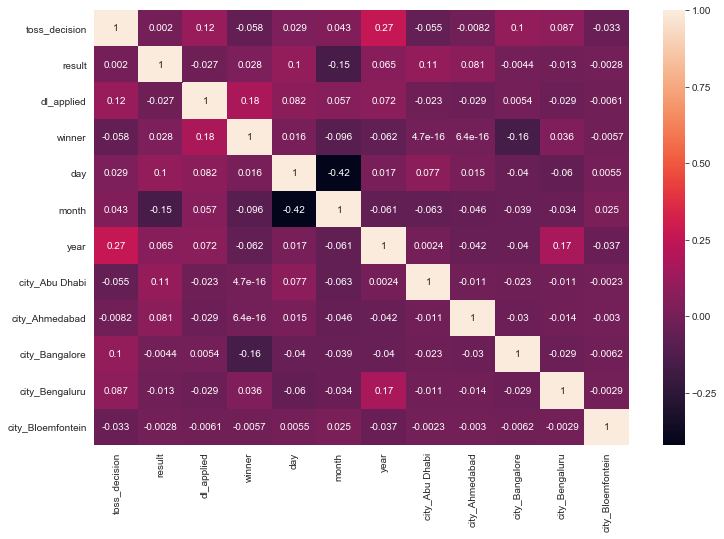

In [37]:
cor = train_upsampled.iloc[:,:12].corr()

sns.set_style("dark")
plt.figure(figsize=(12,8))
sns.heatmap(cor,annot=True)
plt.show()

###### Splitting Data

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
Y = train_upsampled['winner']
X = train_upsampled.drop(columns=['winner'],inplace=False)

In [40]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,train_size=0.8,random_state=2)

In [41]:
#### Function for Multiclass ROC AUC SCORE

In [42]:
from sklearn.preprocessing import LabelBinarizer

In [43]:
def roc_auc_score_multiclass(Y_test,Y_pred):
    lb = LabelBinarizer()
    y_test = lb.fit_transform(Y_test)
    y_pred = lb.fit_transform(Y_pred)
    
    return roc_auc_score(y_test,y_pred)

###### Logistic Regression

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss,confusion_matrix,roc_auc_score,accuracy_score,accuracy_score,f1_score,precision_score,recall_score

In [45]:
def metrics(Y_test,Y_pred,average='macro'):
    print("Accuracy --- > ",accuracy_score(Y_test,Y_pred))
    print("F1-Score --- > ",f1_score(Y_test,Y_pred,average=average))
    print("Precision --- > ",precision_score(Y_test,Y_pred,average=average))
    print("Recall --- > ",recall_score(Y_test,Y_pred,average=average))

In [46]:
log = LogisticRegression().fit(X_train,Y_train)

C:\Users\paddy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\paddy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [47]:
log.score(X_train,Y_train)

0.8983180428134556

In [48]:
log.score(X_test,Y_test)

0.8440366972477065

In [56]:
# lb - Label Binarizer
lb = LabelBinarizer()
y_test_log = lb.fit_transform(Y_test)
y_pred_log = lb.fit_transform(pred_of_logr)

In [57]:
log_loss(y_test_log,y_pred_log)

5.38678163957324

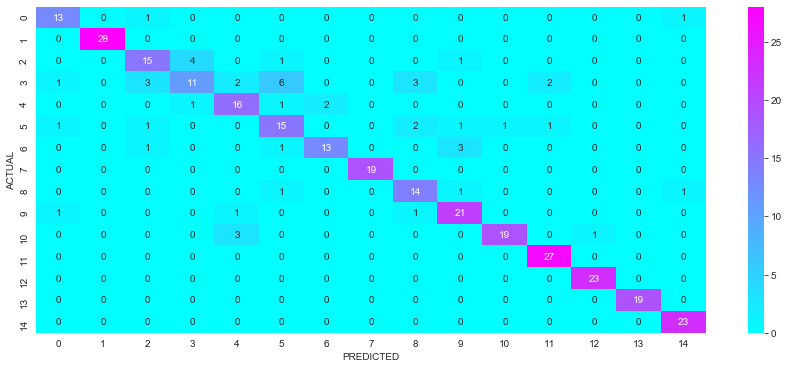

Accuracy --- >  0.8440366972477065
F1-Score --- >  0.83930060474829
Precision --- >  0.840955747955748
Recall --- >  0.8468310864090915
ROC AUC SCORE ---- >  0.9178467531871928


In [54]:
sns.set_style("dark")
plt.figure(figsize=(15,6))
sns.heatmap(confusion_matrix(Y_test,pred_of_logr),annot=True,cmap='cool')
plt.ylabel("ACTUAL")
plt.xlabel("PREDICTED")
plt.show()

metrics(Y_test,pred_of_logr)
print("ROC AUC SCORE ---- > ",roc_auc_score_multiclass(Y_test,pred_of_logr))

In [55]:
log_loss(Y_test,pred_of_logr)

ValueError: y_true and y_pred contain different number of classes 15, 2. Please provide the true labels explicitly through the labels argument. Classes found in y_true: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]

###### Random Forest Classifier

In [54]:
from sklearn.ensemble import RandomForestClassifier

In [55]:
rfc = RandomForestClassifier()

###### Hyper-Parameter Tuning

In [56]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

In [57]:
n_estimators = [int(x) for x in np.linspace(10,150,15)]
max_depth = [int(x) for x in np.linspace(2,30,15)]
min_samples_split = [int(x) for x in np.linspace(10,100,10)]
max_features = ['auto','sqrt']

In [58]:
params = {
    "n_estimators":n_estimators,
    'max_depth':max_depth,
    'min_samples_split':min_samples_split,
    'max_features':max_features
}

In [59]:
model = RandomizedSearchCV(param_distributions=params,verbose=2,n_iter=10,cv=5,estimator=rfc,random_state=11)

In [60]:
model.fit(X,Y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=110, min_samples_split=100, max_features=auto, max_depth=14 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=110, min_samples_split=100, max_features=auto, max_depth=14, total=   0.6s
[CV] n_estimators=110, min_samples_split=100, max_features=auto, max_depth=14 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


[CV]  n_estimators=110, min_samples_split=100, max_features=auto, max_depth=14, total=   0.6s
[CV] n_estimators=110, min_samples_split=100, max_features=auto, max_depth=14 
[CV]  n_estimators=110, min_samples_split=100, max_features=auto, max_depth=14, total=   0.6s
[CV] n_estimators=110, min_samples_split=100, max_features=auto, max_depth=14 
[CV]  n_estimators=110, min_samples_split=100, max_features=auto, max_depth=14, total=   0.6s
[CV] n_estimators=110, min_samples_split=100, max_features=auto, max_depth=14 
[CV]  n_estimators=110, min_samples_split=100, max_features=auto, max_depth=14, total=   0.6s
[CV] n_estimators=110, min_samples_split=20, max_features=sqrt, max_depth=26 
[CV]  n_estimators=110, min_samples_split=20, max_features=sqrt, max_depth=26, total=   0.7s
[CV] n_estimators=110, min_samples_split=20, max_features=sqrt, max_depth=26 
[CV]  n_estimators=110, min_samples_split=20, max_features=sqrt, max_depth=26, total=   0.9s
[CV] n_estimators=110, min_samples_split=20, 

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   19.1s finished
C:\Users\paddy\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=None

In [62]:
model.best_params_

{'n_estimators': 110,
 'min_samples_split': 20,
 'max_features': 'sqrt',
 'max_depth': 26}

In [78]:
del rfc

In [79]:
# making model with best parameters

In [80]:
rfc = RandomForestClassifier(n_estimators=110,
                            min_samples_split=20,
                            max_features='auto',
                            max_depth=26)

In [81]:
rfc.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=26, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, n_estimators=110,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [82]:
rfc.score(X_train,Y_train)

0.8944954128440367

In [83]:
rfc.score(X_test,Y_test)

0.8348623853211009

In [84]:
pred_of_forest = rfc.predict(X_test)

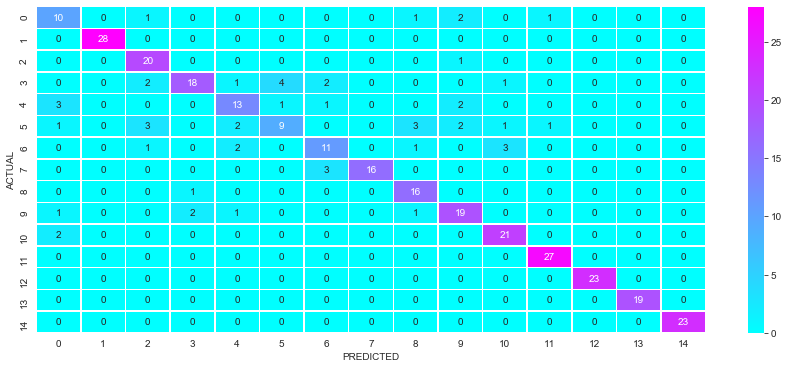

Accuracy --- >  0.8348623853211009
F1-Score --- >  0.8202994941566369
Precision --- >  0.8238009422130984
Recall --- >  0.8280065773853632
ROC AUC SCORE ---- >  0.9081275808404713


In [85]:
plt.figure(figsize=(15,6))
sns.heatmap(confusion_matrix(Y_test,pred_of_forest),annot=True,cmap='cool',linewidths=0.5,fmt='d')
plt.ylabel("ACTUAL")
plt.xlabel("PREDICTED")
plt.show()

metrics(Y_test,pred_of_forest)
print("ROC AUC SCORE ---- > ",roc_auc_score_multiclass(Y_test,pred_of_forest))

In [87]:
##### gradient boost

In [99]:
import xgboost as xgb

In [163]:
xg = xgb.XGBClassifier(n_estimators=110,min_samples_split=30,max_depth=7,learning_rate=0.008,gamma=0.5).fit(X_train,Y_train)

[11:15:30] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { min_samples_split } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




In [164]:
xg.score(X_train,Y_train)

0.9396024464831805

In [165]:
xg.score(X_test,Y_test)

0.8562691131498471

In [168]:
pred_of_xgb = xg.predict(X_test)

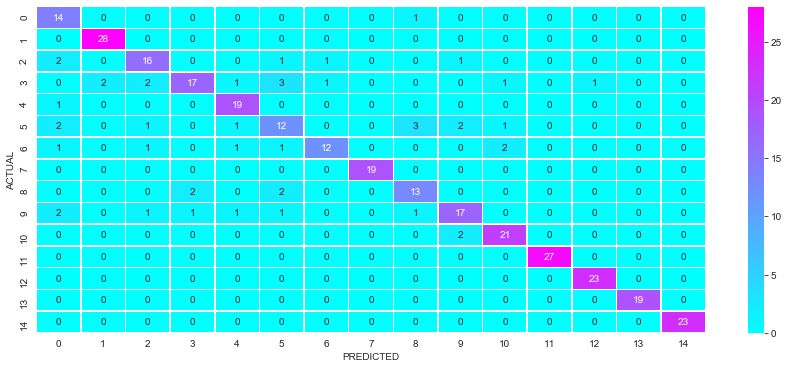

Accuracy --- >  0.8562691131498471
F1-Score --- >  0.8488915051286908
Precision --- >  0.8505409582366105
Recall --- >  0.8567056572299538
ROC AUC SCORE ---- >  0.9232357396196443


In [169]:
plt.figure(figsize=(15,6))
sns.heatmap(confusion_matrix(Y_test,pred_of_xgb),annot=True,cmap='cool',linewidths=0.5,fmt='d')
plt.ylabel("ACTUAL")
plt.xlabel("PREDICTED")
plt.show()

metrics(Y_test,pred_of_xgb)
print("ROC AUC SCORE ---- > ",roc_auc_score_multiclass(Y_test,pred_of_xgb))